In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
print(df.head())
label = df['Class']

print(f"Number of missing values in each column of data:")
print(df.isna().sum())   
print(f"Statistical data of the features:")
print(df.describe()) 

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Number of missing values in each column of data:
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64
Statistical data of the features:
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.

In [3]:
n_samples , n_features = df.drop(['Class'],axis=1).shape
print(f"number of features: {n_features} and number of samples: {n_samples}")

number of features: 4 and number of samples: 150


In [4]:
import seaborn as sns

### Boxplot of features

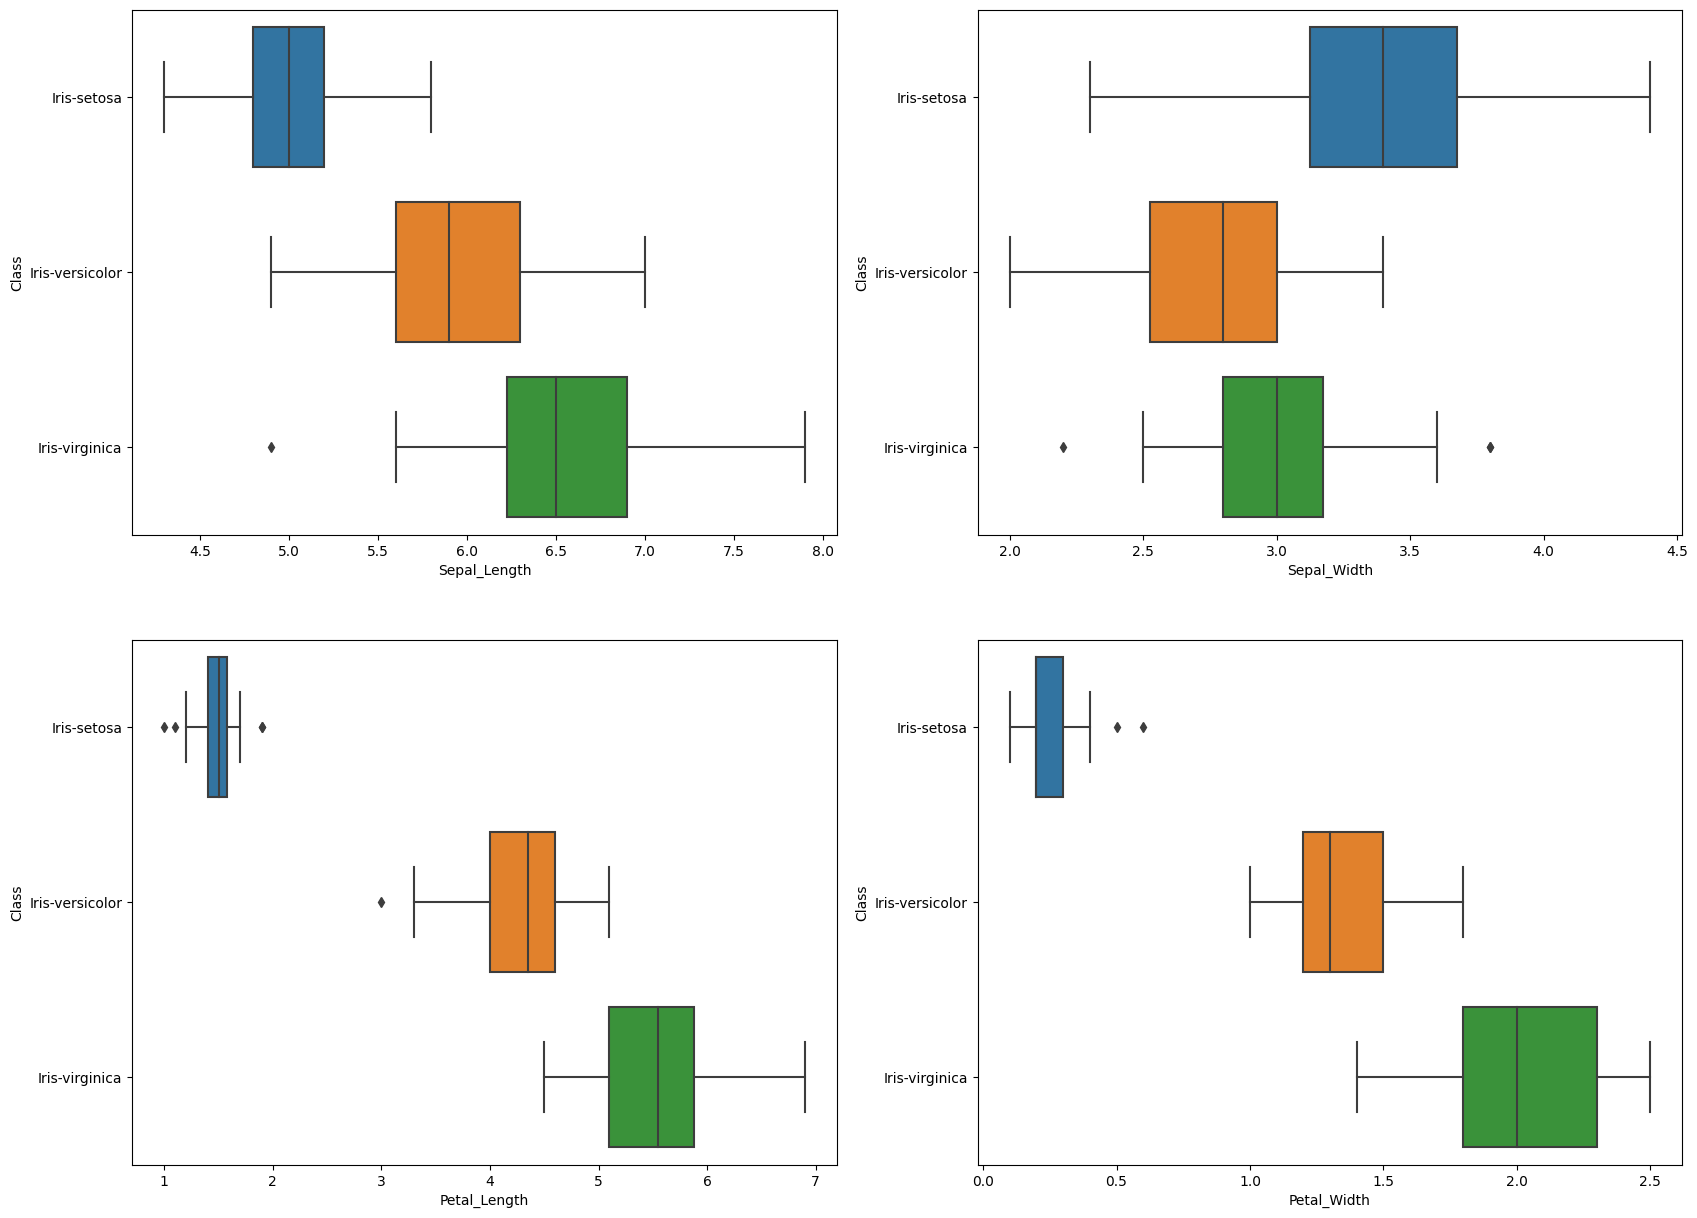

In [5]:
features = ["Sepal_Length" ,"Sepal_Width" , "Petal_Length" ,"Petal_Width"]

fig,ax = plt.subplots(2,2,figsize=(20,15))

sns.boxplot(x = df[features[0]],ax = ax[0,0], y=df['Class'])
sns.boxplot(x = df[features[1]],ax = ax[0,1], y=df['Class'])
sns.boxplot(x = df[features[2]],ax = ax[1,0], y=df['Class'])
sns.boxplot(x = df[features[3]],ax = ax[1,1], y=df['Class'])

plt.savefig('Q1 - boxplot of features.png')
plt.show()
    

### Scatter-plot of features

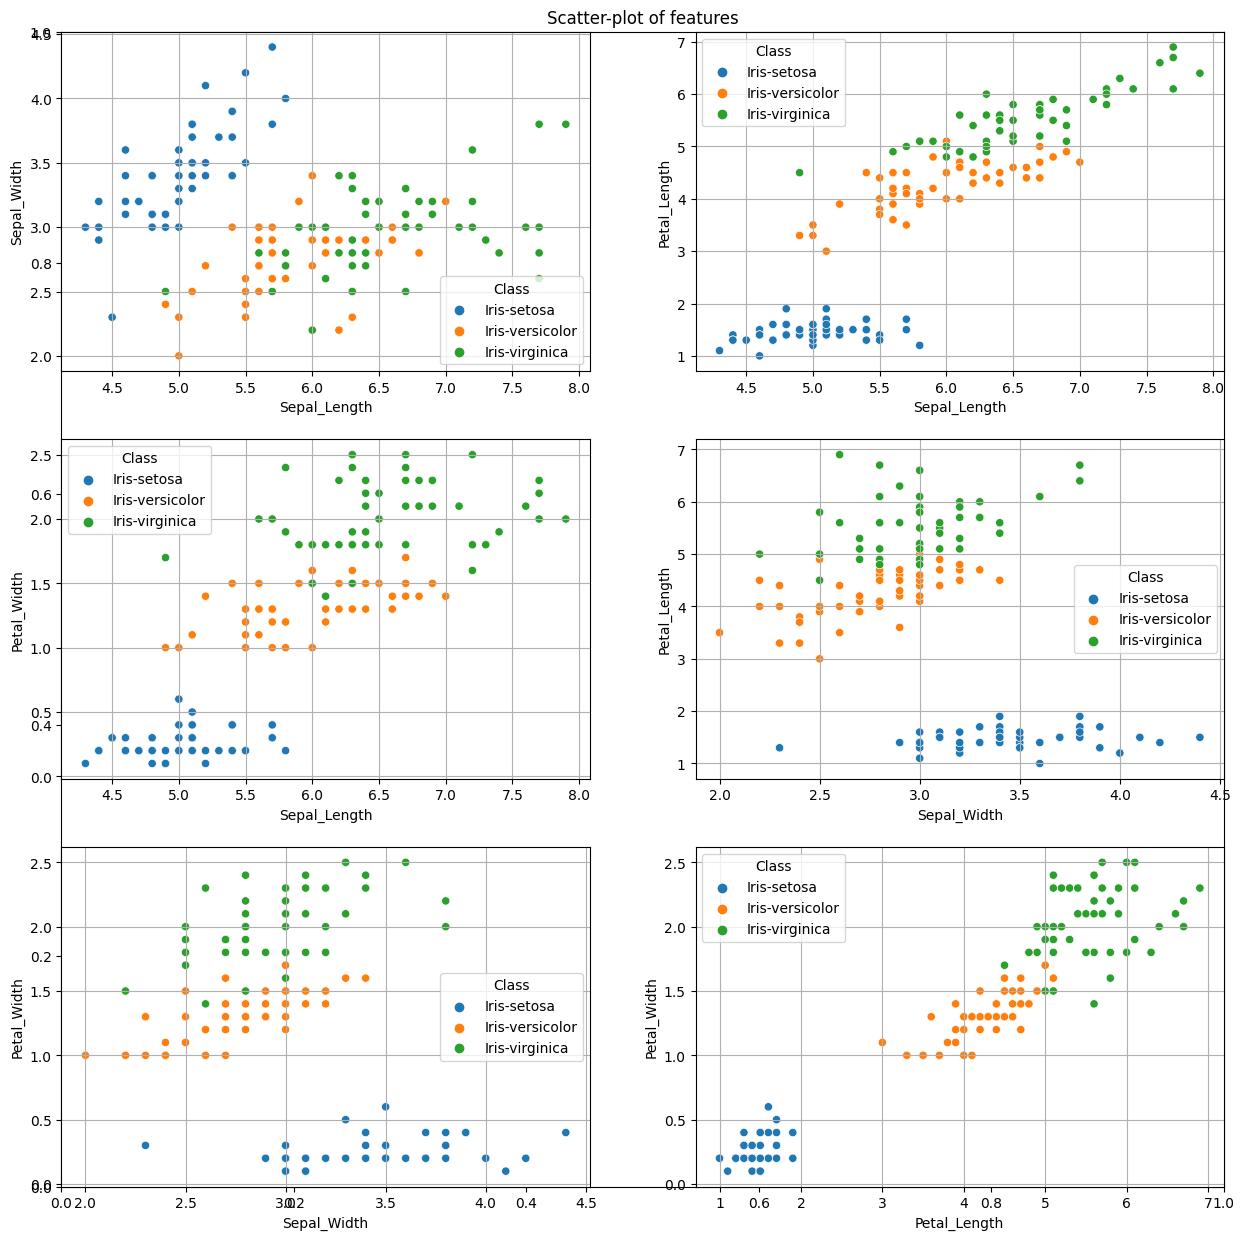

In [6]:
fig = plt.figure(figsize=(15,15))
plt.title("Scatter-plot of features")
ax1 = fig.add_subplot(321)
plt.grid()
sns.scatterplot(data=df, x = df[features[0]], y=df[features[1]] , hue=df['Class'])
ax2 = fig.add_subplot(322)
plt.grid()
sns.scatterplot(data=df, x = df[features[0]], y=df[features[2]] , hue=df['Class'])
ax3 = fig.add_subplot(323)
plt.grid()
sns.scatterplot(data=df, x = df[features[0]], y=df[features[3]] , hue=df['Class'])
ax4 = fig.add_subplot(324)
plt.grid()
sns.scatterplot(data=df, x = df[features[1]], y=df[features[2]] , hue=df['Class'])
ax5 = fig.add_subplot(325)
plt.grid()
sns.scatterplot(data=df, x = df[features[1]], y=df[features[3]] , hue=df['Class'])
ax6 = fig.add_subplot(326)
plt.grid()
sns.scatterplot(data=df, x = df[features[2]], y=df[features[3]] , hue=df['Class'])

plt.savefig('Q1 - Scatter-plot of features.png')
plt.show()

## Section A

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, jaccard_score , precision_score , recall_score

In [8]:
rand_st = [0,24,423,1234]
for i in range(len(rand_st)):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(["Class"],axis=1),label, 
                                                        test_size=0.2, random_state = rand_st[i])
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    print(f"accuracy Score (before normalization) for rand_state {rand_st[i]}: {accuracy_score(y_test,pred)}")
    print(f"Jaccard Score (before normalization) for rand_state {rand_st[i]}: {jaccard_score(y_test,pred,average='macro')}")
    print(f"precision Score (before normalization) for rand_state {rand_st[i]}: {precision_score(y_test,pred,average='macro')}")
    print(f"recall Score (before normalization) for rand_state {rand_st[i]}: {recall_score(y_test,pred,average='macro')}\n\n")

accuracy Score (before normalization) for rand_state 0: 0.9666666666666667
Jaccard Score (before normalization) for rand_state 0: 0.9267399267399267
precision Score (before normalization) for rand_state 0: 0.9523809523809524
recall Score (before normalization) for rand_state 0: 0.9743589743589745


accuracy Score (before normalization) for rand_state 24: 0.9666666666666667
Jaccard Score (before normalization) for rand_state 24: 0.8970588235294118
precision Score (before normalization) for rand_state 24: 0.9803921568627452
recall Score (before normalization) for rand_state 24: 0.9166666666666666


accuracy Score (before normalization) for rand_state 423: 0.9666666666666667
Jaccard Score (before normalization) for rand_state 423: 0.9465811965811967
precision Score (before normalization) for rand_state 423: 0.9743589743589745
recall Score (before normalization) for rand_state 423: 0.9722222222222222


accuracy Score (before normalization) for rand_state 1234: 1.0
Jaccard Score (before nor

### Confusion Matrix Function

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def cm(y_true,y_pred,txt):
    cm = confusion_matrix(y_true, y_pred, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    fig, ax = plt.subplots(figsize=(8,5))
    disp.plot(ax = ax)
    plt.title('confusion matrix '+ txt)
    plt.savefig('Q1 - confusion matrix '+ txt + '.png')
    plt.show()

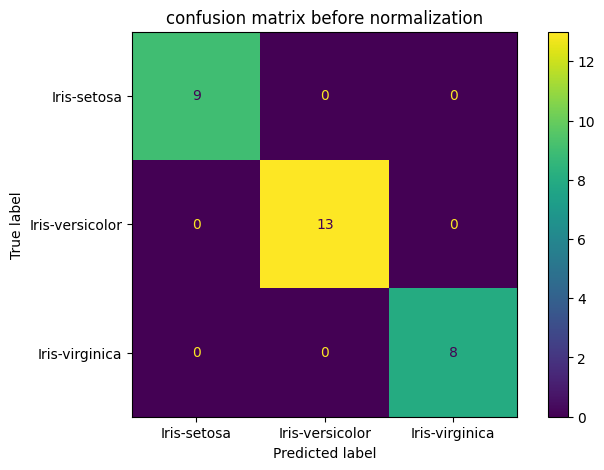

In [10]:
cm(y_test,pred,'before normalization')

In [11]:
from matplotlib.colors import ListedColormap
from sklearn import datasets

### Decision boundary definition

In [12]:
def dbp(X,y,m,n):
    
    plt.rcParams["figure.figsize"] = [4.50, 4.50]
    plt.rcParams["figure.autolayout"] = True

    n_neighbors = 3
    h = .05
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']


    clf = KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
    palette=cmap_bold, alpha=1.0, edgecolor="black")
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title("3-Class classification (k = %i, 'uniform' = '%s')"
    % (n_neighbors, 'uniform'))

    plt.xlabel(m)
    plt.ylabel(n)
    plt.savefig('Q1_Decision Boundary for different features\Decision Boundary for features ' + m +'and '+ n + '.png')
    plt.show()

### Decision boundary for different features

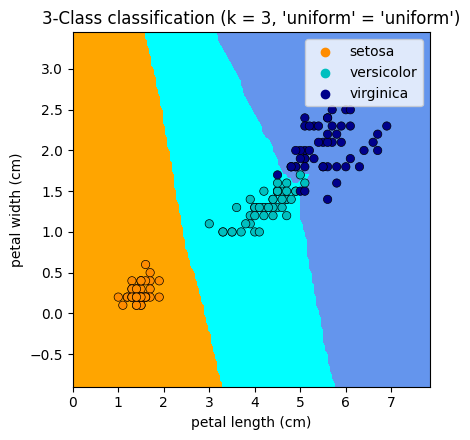

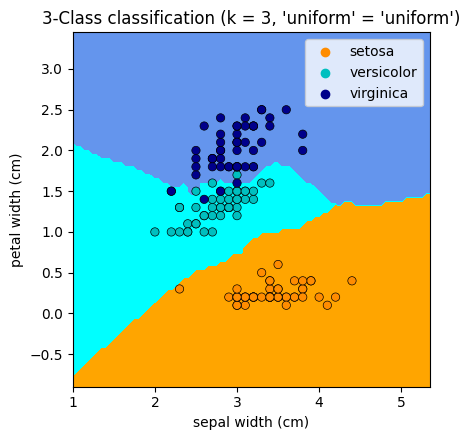

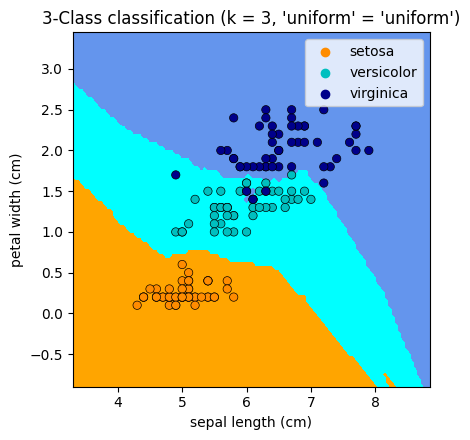

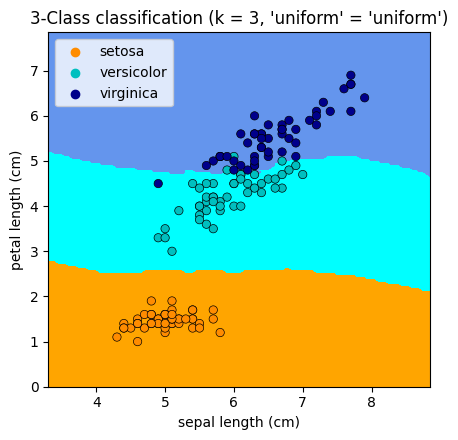

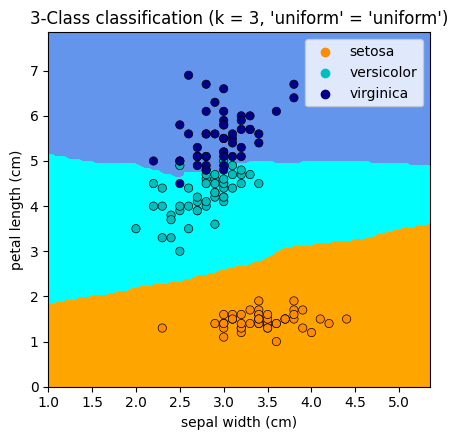

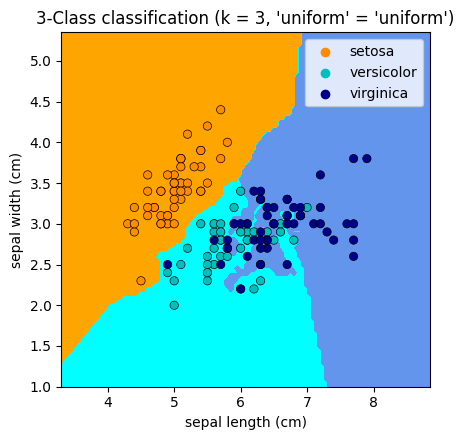

In [13]:
#Decision boundary plotting for different features
iris = datasets.load_iris()
XX = iris.data[:, 2:]
yy = iris.target
dbp(XX,yy,iris.feature_names[2],iris.feature_names[3]) #for features 2 & 3

X1 = iris.data[:, 1].reshape(-1,1)
X2 = iris.data[:,3].reshape(-1,1)
XX = np.hstack((X1,X2))
dbp(XX,yy,iris.feature_names[1],iris.feature_names[3]) #for features 1 & 3

X1 = iris.data[:, 0].reshape(-1,1)
X2 = iris.data[:,3].reshape(-1,1)
XX = np.hstack((X1,X2))
dbp(XX,yy,iris.feature_names[0],iris.feature_names[3]) #for features 0 & 3

X1 = iris.data[:, 0].reshape(-1,1)
X2 = iris.data[:,2].reshape(-1,1)
XX = np.hstack((X1,X2))
dbp(XX,yy,iris.feature_names[0],iris.feature_names[2]) #for features 0 & 2

X1 = iris.data[:, 1].reshape(-1,1)
X2 = iris.data[:,2].reshape(-1,1)
XX = np.hstack((X1,X2))
dbp(XX,yy,iris.feature_names[1],iris.feature_names[2]) #for features 1 & 2

X1 = iris.data[:, 0].reshape(-1,1)
X2 = iris.data[:,1].reshape(-1,1)
XX = np.hstack((X1,X2))
dbp(XX,yy,iris.feature_names[0],iris.feature_names[1]) #for features 0 & 1

## Section B

In [14]:
from sklearn.preprocessing import normalize

In [15]:
df_normalized = normalize(df.drop(["Class"],axis=1) , norm='l2')
#df_normalized

In [16]:
for i in range(len(rand_st)):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_normalized,label, test_size=0.2,random_state = rand_st[i])
    knn.fit(X_train2, y_train2)
    pred2 = knn.predict(X_test2)
    
    print(f"accuracy Score after normalization for rand_state {rand_st[i]}: {accuracy_score(y_test2,pred2)}")
    print(f"Jaccard Score after normalization for rand_state {rand_st[i]}: {jaccard_score(y_test2,pred2,average='macro')}")
    print(f"precision Score after normalization for rand_state {rand_st[i]}: {precision_score(y_test2,pred2,average='macro')}")
    print(f"recall Score after normalization for rand_state {rand_st[i]}: {recall_score(y_test2,pred2,average='macro')}\n\n")


accuracy Score after normalization for rand_state 0: 0.9666666666666667
Jaccard Score after normalization for rand_state 0: 0.9267399267399267
precision Score after normalization for rand_state 0: 0.9523809523809524
recall Score after normalization for rand_state 0: 0.9743589743589745


accuracy Score after normalization for rand_state 24: 0.9666666666666667
Jaccard Score after normalization for rand_state 24: 0.8970588235294118
precision Score after normalization for rand_state 24: 0.9803921568627452
recall Score after normalization for rand_state 24: 0.9166666666666666


accuracy Score after normalization for rand_state 423: 0.9333333333333333
Jaccard Score after normalization for rand_state 423: 0.8968253968253969
precision Score after normalization for rand_state 423: 0.9523809523809524
recall Score after normalization for rand_state 423: 0.9444444444444445


accuracy Score after normalization for rand_state 1234: 1.0
Jaccard Score after normalization for rand_state 1234: 1.0
preci

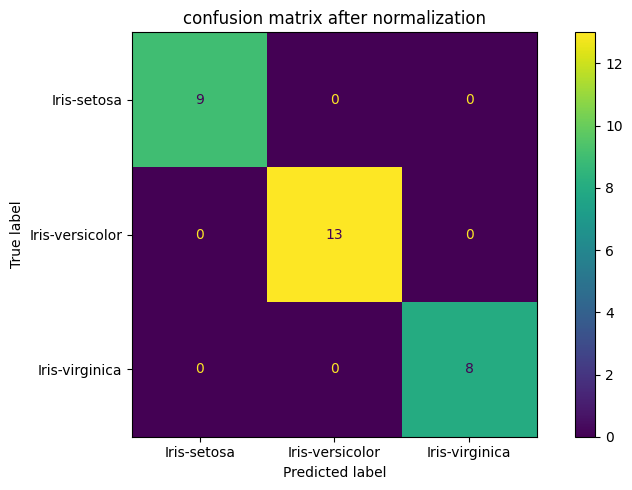

In [17]:
pred2 = knn.predict(X_test2)

cm(y_test2,pred2,'after normalization')